In [2]:
library(dplyr)
library(stringr)
library(lme4)
library(ggplot2)
library(tidyr)
library(insight)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'tidyr'

The following object is masked from 'package:Matrix':

    expand

Warning message:
"package 'insight' was built under R version 3.6.3"

In [6]:
# reading the csvfile:
all_df <- read.csv('...data_readin_LMM_r.csv')
class(all_df)
dim(all_df)
head(all_df)

[1] "data.frame"

[1] 180   9

Site,Date,Area,T,pH,EC,diss_CO2,diss_CH4,diss_N2O
B_P2_,31/07/2016,36,13.75,5.94,14.7,206.7818,3.2656,5.81
B_P3,31/07/2016,156,13.25,6.31,15.3,141.7500,6.0922,5.18
B_P4,31/07/2016,165,15.05,6.67,14.8,118.0000,2.4873,5.64
B_P5,31/07/2016,96,15.05,5.94,19.8,404.3800,10.0517,4.05
B_P6,31/07/2016,3,12.95,5.14,28.2,725.6120,64.2175,4.06
B_P7,31/07/2016,56,14.20,6.20,15.1,294.0076,5.0685,5.55


In [7]:
# Delete rows that have more than 3 columns with NaNs
delete.na <- function(DF, n=0) {
  DF[rowSums(is.na(DF)) <= n,]
}
all_df <- delete.na(all_df, 3)
dim(all_df)

[1] 180   9

In [8]:
# Adding year column based on inital letter of Site column:
all_df <- all_df %>%
  mutate(Year = case_when(
    startsWith(as.character(Site), "A") ~ "2015",
    startsWith(as.character(Site), "B") ~ "2016",
    startsWith(as.character(Site), "C") ~ "2017",  
    TRUE ~ as.character(Site)))

# Adding waterbody type column based on second letter of Site column string:
all_df <- all_df %>%
  mutate(WbType = case_when(
    str_detect(as.character(Site), "L") ~ "Lake",
    str_detect(as.character(Site), "P") ~ "Pond",
    str_detect(as.character(Site), "R") ~ "Fluvial", 
    str_detect(as.character(Site), "T") ~ "Flood"))

# Adding specific waterbody column based on second letter and numbers of Site column string:
all_df <- all_df %>%
  mutate(Wb = case_when(
    str_detect(as.character(Site), "L1") ~ "Lake_T",
    str_detect(as.character(Site), "L2") ~ "Lake_1",
    str_detect(as.character(Site), "L3") ~ "Lake_2",
    str_detect(as.character(Site), "_P1_") ~ "P1",
    str_detect(as.character(Site), "_P2_") ~ "P2",
    str_detect(as.character(Site), "P3") ~ "P3",
    str_detect(as.character(Site), "P4") ~ "P4",
    str_detect(as.character(Site), "P5") ~ "P5",
    str_detect(as.character(Site), "P6") ~ "P6",
    str_detect(as.character(Site), "P7") ~ "P7",
    str_detect(as.character(Site), "P8") ~ "P8",
    str_detect(as.character(Site), "P9") ~ "P9",
    str_detect(as.character(Site), "P10") ~ "P10",
    str_detect(as.character(Site), "P11") ~ "P11",
    str_detect(as.character(Site), "P12") ~ "P12",
    str_detect(as.character(Site), "R1") ~ "River_Side", 
    str_detect(as.character(Site), "R2") ~ "River",
    str_detect(as.character(Site), "R3") ~ "River",
    str_detect(as.character(Site), "R4") ~ "River_Side", 
    str_detect(as.character(Site), "R5") ~ "Drainage_Path",
    str_detect(as.character(Site), "R6") ~ "Drainage_Path",
    str_detect(as.character(Site), "R7") ~ "Stream",
    str_detect(as.character(Site), "R8") ~ "Stream",
    str_detect(as.character(Site), "R9") ~ "Stream",
    str_detect(as.character(Site), "R10") ~ "River",
    str_detect(as.character(Site), "R11") ~ "Stream",
    str_detect(as.character(Site), "T") ~ "Flood"))

# To get a column with only site names split the string from orginal 'Site' column and keep site name in dataframe only
all_df = separate(data = all_df, col = Site, into = c("year_no", "Wb_site", "rep_no"), sep = "\\_")
all_df <- subset(all_df, select = -c(year_no, rep_no))

head(all_df)

Warning message:
"Expected 3 pieces. Additional pieces discarded in 3 rows [52, 68, 169]."Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 55 rows [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, ...]."

Wb_site,Date,Area,T,pH,EC,diss_CO2,diss_CH4,diss_N2O,Year,WbType,Wb
P2,31/07/2016,36,13.75,5.94,14.7,206.7818,3.2656,5.81,2016,Pond,P2
P3,31/07/2016,156,13.25,6.31,15.3,141.7500,6.0922,5.18,2016,Pond,P3
P4,31/07/2016,165,15.05,6.67,14.8,118.0000,2.4873,5.64,2016,Pond,P4
P5,31/07/2016,96,15.05,5.94,19.8,404.3800,10.0517,4.05,2016,Pond,P5
P6,31/07/2016,3,12.95,5.14,28.2,725.6120,64.2175,4.06,2016,Pond,P6
P7,31/07/2016,56,14.20,6.20,15.1,294.0076,5.0685,5.55,2016,Pond,P7


In [9]:
# Make dataframes for each waterbody
Lake <- all_df %>%
  filter(str_detect(WbType, "Lake"))

# Make dataframes for 2016 lake data
Lake_16 <- Lake %>%
  filter(str_detect(Year, "2016"))
# Make dataframes for 2017 lake data
Lake_17 <- Lake %>%
  filter(str_detect(Year, "2017"))

# Remove nans
Lake <- Lake[!is.na(Lake$diss_CO2), ]

Pond <- all_df %>%
  filter(str_detect(WbType, "Pond"))
Pond <- Pond[!grepl("P6", Pond$Wb_site),]

Fluvial <- all_df %>%
  filter(str_detect(WbType, "Fluvial"))

# Lakes

## Dissolved CO2 concentrations

In [10]:
model.lake.1 <- lmer(diss_CO2 ~ (1|Wb) + (1|Year), data = Lake)
summary(model.lake.1)

Linear mixed model fit by REML ['lmerMod']
Formula: diss_CO2 ~ (1 | Wb) + (1 | Year)
   Data: Lake

REML criterion at convergence: 444.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5525 -0.6145 -0.1155  0.4295  3.1518 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb       (Intercept)  2.93    1.712   
 Year     (Intercept) 14.99    3.871   
 Residual             86.41    9.296   
Number of obs: 61, groups:  Wb, 3; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   40.218      3.152   12.76

In [18]:
vc = VarCorr(model.lake.1)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wb = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between lake variance is %.0f%%', var_wb))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within lake and year variance is %.0f%%', var_within))


 Groups   Name        Variance Std.Dev.
 Wb       (Intercept)  2.9     1.7     
 Year     (Intercept) 15.0     3.9     
 Residual             86.4     9.3     
[1] "The between lake variance is 3%"
[1] "The between year variance is 14%"
[1] "The within lake and year variance is 83%"


In [20]:
model.lake.2 <- lmer(diss_CO2 ~ (1|Wb_site) + (1|Year), data = Lake)
summary(model.lake.2)

Linear mixed model fit by REML ['lmerMod']
Formula: diss_CO2 ~ (1 | Wb_site) + (1 | Year)
   Data: Lake

REML criterion at convergence: 432

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9725 -0.6136 -0.1431  0.5211  2.6995 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 36.75    6.062   
 Year     (Intercept) 13.70    3.701   
 Residual             53.74    7.331   
Number of obs: 61, groups:  Wb_site, 12; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   40.110      3.289    12.2

### How well does model predict data

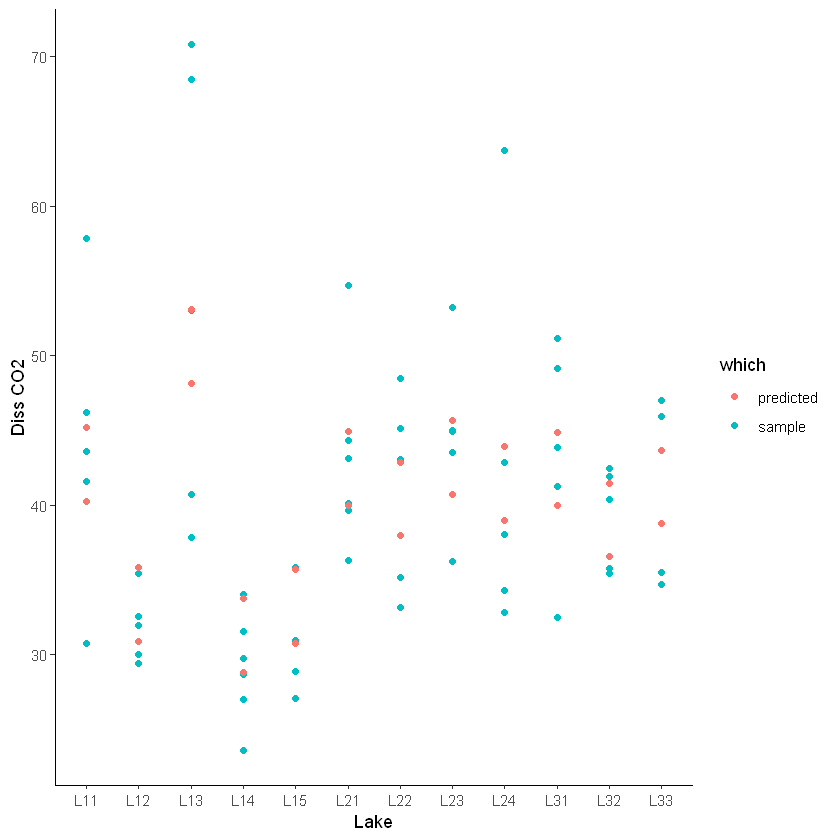

In [10]:
# Make a dataframe with sampled and predcited by model_lakes dissolved CO2 data in one column
# and what CO2 value it is (sample or predict) in another column so can boxplot
CO2 <-  Lake$diss_CO2
site <- Lake$Wb_site
which <- 'sample'
Lake_CO2_plot <- data.frame(site, which, CO2)

which <- 'predicted'
predictDf <- data.frame(Wb_site = Lake$Wb_site, Year = Lake$Year)
modelled_CO2 <- predict(model.lake.2, predictDf)
modelled_site <- predictDf$Wb_site
modelled <- data.frame(site = modelled_site, which = which, CO2 = modelled_CO2) 

Lake_CO2_plot <- rbind(Lake_CO2_plot, modelled)

# Plot
(split_plot <- ggplot(aes(x = site, y = CO2, colour = which), data = Lake_CO2_plot ) + 
  geom_point() + 
  theme_classic() +
  xlab("Lake") + 
  ylab("Diss CO2"))

In [22]:
vc = VarCorr(model.lake.2)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wbsite = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between lake site variance is %.0f%%', var_wbsite))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within lake site and year variance is %.0f%%', var_within))

 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 37       6.1     
 Year     (Intercept) 14       3.7     
 Residual             54       7.3     
[1] "The between lake site variance is 35%"
[1] "The between year variance is 13%"
[1] "The within lake site and year variance is 52%"


## Dissolved CH4 concentrations

In [23]:
model.lake.ch4.1 <- lmer(diss_CH4 ~ (1|Wb) + (1|Year), data = Lake)
summary(model.lake.ch4.1)

Linear mixed model fit by REML ['lmerMod']
Formula: diss_CH4 ~ (1 | Wb) + (1 | Year)
   Data: Lake

REML criterion at convergence: 42.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.20335 -0.60993  0.06483  0.66979  2.36082 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb       (Intercept) 0.02662  0.1632  
 Year     (Intercept) 0.43830  0.6620  
 Residual             0.09608  0.3100  
Number of obs: 61, groups:  Wb, 3; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   0.8187     0.4793   1.708

In [24]:
vc = VarCorr(model.lake.ch4.1)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wb = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between lake variance is %.0f%%', var_wb))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within lake and year variance is %.0f%%', var_within))

 Groups   Name        Variance Std.Dev.
 Wb       (Intercept) 0.027    0.16    
 Year     (Intercept) 0.438    0.66    
 Residual             0.096    0.31    
[1] "The between pond variance is 5%"
[1] "The between year variance is 78%"
[1] "The within pond and year variance is 17%"


In [27]:
model.lake.ch4.2 <- lmer(diss_CH4 ~ (1|Wb_site) + (1|Year), data = Lake)
summary(model.lake.ch4.2)

Linear mixed model fit by REML ['lmerMod']
Formula: diss_CH4 ~ (1 | Wb_site) + (1 | Year)
   Data: Lake

REML criterion at convergence: 47.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.31809 -0.55762  0.05188  0.64697  2.58319 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 0.01936  0.1391  
 Year     (Intercept) 0.43388  0.6587  
 Residual             0.09756  0.3123  
Number of obs: 61, groups:  Wb_site, 12; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   0.8386     0.4693   1.787

In [14]:
# Make a dataframe with sampled and predcited  dissolved CH4 data from model model.lake.ch4.1
CH4 <-  Lake$diss_CH4
site <- Lake$Wb_site
year <- Lake$Year
which <- 'sample'
Lake_CH4_plot <- data.frame(site, which, CH4, year)

which <- 'predicted'
predictDf <- data.frame(Wb_site = Lake$Wb_site, Year = Lake$Year)
modelled_CH4 <- predict(model.lake.ch4.1, predictDf)
#modelled_which <- which
modelled_site <- predictDf$Wb_site
modelled_year <- predictDf$Year
modelled <- data.frame(site = modelled_site, which = which, CH4 = modelled_CH4, year = modelled_year) 

Lake_CH4_plot <- rbind(Lake_CH4_plot, modelled)

(split_plot <- ggplot(aes(x = site, y = CH4, colour = which), data = Lake_CH4_plot ) + 
  geom_point() + 
  theme_classic() +
  xlab("Lake") + 
  ylab("Diss CH4"))

ERROR: Error in eval(predvars, data, env): object 'Wb' not found


In [ ]:
# Make a dataframe with sampled and predcited dissolved CH4 data from model model.lake.ch4.2
CH4 <-  Lake$diss_CH4
site <- Lake$Wb_site
year <- Lake$Year
which <- 'sample'
Lake_CH4_plot <- data.frame(site, which, CH4, year)

which <- 'predicted'
predictDf <- data.frame(Wb_site = Lake$Wb_site, Year = Lake$Year)
modelled_CH4 <- predict(model.lake.ch4.2, predictDf)
#modelled_which <- which
modelled_site <- predictDf$Wb_site
modelled_year <- predictDf$Year
modelled <- data.frame(site = modelled_site, which = which, CH4 = modelled_CH4, year = modelled_year) 

Lake_CH4_plot <- rbind(Lake_CH4_plot, modelled)

(split_plot <- ggplot(aes(x = site, y = CH4, colour = which), data = Lake_CH4_plot ) + 
  geom_point() + 
  theme_classic() +
  xlab("Lake") + 
  ylab("Diss CH4"))

In [29]:
vc = VarCorr(model.lake.ch4.2)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wbsite = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between lake site variance is %.0f%%', var_wbsite))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within lake site and year variance is %.0f%%', var_within))

 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 0.019    0.14    
 Year     (Intercept) 0.434    0.66    
 Residual             0.098    0.31    
[1] "The between pond site variance is 4%"
[1] "The between year variance is 79%"
[1] "The within pond site and year variance is 18%"


## Dissolved N2O concentrations

In [31]:
model.lake.n2o.1 <- lmer(diss_N2O ~ (1|Wb_site) + (1|Year), data = Lake)
summary(model.lake.n2o.1)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML ['lmerMod']
Formula: diss_N2O ~ (1 | Wb_site) + (1 | Year)
   Data: Lake

REML criterion at convergence: 190.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.90832 -0.56873 -0.06046  0.66036  2.08390 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept)  0.000   0.000   
 Year     (Intercept) 21.161   4.600   
 Residual              1.171   1.082   
Number of obs: 61, groups:  Wb_site, 12; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   10.075      3.256   3.095
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


In [ ]:
model.lake.n2o.2 <- lmer(diss_N2O ~ (1|Wb) + (1|Year), data = Lake)
summary(model.lake.n2o.2)

In [ ]:
# Make a dataframe with sampled and predcited dissolved N2O data from model model.lake.n2o.1
N2O <-  Lake$diss_N2O
site <- Lake$Wb_site
year <- Lake$Year
which <- 'sample'
Lake_N2O_plot <- data.frame(site, which, N2O, year)

which <- 'predicted'
predictDf <- data.frame(Wb_site = Lake$Wb_site, Year = Lake$Year)
modelled_N2O <- predict(model.lake.n2o.1, predictDf)
modelled_site <- predictDf$Wb_site
modelled_year <- predictDf$Year
modelled <- data.frame(site = modelled_site, which = which, N2O = modelled_N2O, year = modelled_year) 

Lake_N2O_plot <- rbind(Lake_N2O_plot, modelled)

(split_plot <- ggplot(aes(x = site, y = N2O, colour = which), data = Lake_N2O_plot ) + 
  geom_point() + 
  theme_classic() +
  xlab("Lake") + 
  ylab("Diss N2O"))

In [32]:
vc = VarCorr(model.lake.n2o.1)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wbsite = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between lake site variance is %.0f%%', var_wbsite))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within lake site and year variance is %.0f%%', var_within))

 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept)  0.0     0.0     
 Year     (Intercept) 21.2     4.6     
 Residual              1.2     1.1     
[1] "The between lake site variance is 0%"
[1] "The between year variance is 95%"
[1] "The within lake site and year variance is 5%"


# Ponds

## Dissolved CO2 concentrations

In [33]:
model.pond.co2 <- lmer(diss_CO2 ~ (1|Wb_site) + (1|Year), data = Pond)
summary(model.pond.co2)

Linear mixed model fit by REML ['lmerMod']
Formula: diss_CO2 ~ (1 | Wb_site) + (1 | Year)
   Data: Pond

REML criterion at convergence: 831.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.17297 -0.66470  0.02522  0.54606  2.01854 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 13370    115.63  
 Year     (Intercept)  2428     49.27  
 Residual             11404    106.79  
Number of obs: 67, groups:  Wb_site, 11; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)    339.7       51.0   6.662

### How well does model predict data?

In [ ]:
# Make a dataframe with sampled and predcited by model_ponds dissolved CO2 data in one column
# and what CO2 value it is (sample or predict) in another column so can boxplot
CO2 <-  Pond$diss_CO2
site <- Pond$Wb_site
which <- 'sample'
Pond_CO2_plot <- data.frame(site, which, CO2)

which <- 'predicted'
predictDf <- data.frame(Wb_site = Pond$Wb_site, Year = Pond$Year)
modelled_CO2 <- predict(model.pond.co2, predictDf)
modelled_site <- predictDf$Wb_site
modelled <- data.frame(site = modelled_site, which = which, CO2 = modelled_CO2) 

Pond_CO2_plot <- rbind(Pond_CO2_plot, modelled)


(split_plot <- ggplot(aes(x = site, y = CO2, colour = which), data = Pond_CO2_plot ) + 
  geom_point() + 
  theme_classic() +
  xlab("Pond") + 
  ylab("Diss CO2"))

In [34]:
vc = VarCorr(model.pond.co2)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wbsite = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between pond site variance is %.0f%%', var_wbsite))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within pond site and year variance is %.0f%%', var_within))

 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 13370    116     
 Year     (Intercept)  2428     49     
 Residual             11404    107     
[1] "The between pond site variance is 49%"
[1] "The between year variance is 9%"
[1] "The within pond site and year variance is 42%"


## Dissolved CH4 concentrations

In [35]:
model.pond.ch4 <- lmer(diss_CH4 ~ (1|Wb_site) + (1|Year), data = Pond)
summary(model.pond.ch4)

Linear mixed model fit by REML ['lmerMod']
Formula: diss_CH4 ~ (1 | Wb_site) + (1 | Year)
   Data: Pond

REML criterion at convergence: 480.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0105 -0.5678 -0.0974  0.3276  3.5635 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 58.843   7.671   
 Year     (Intercept)  4.973   2.230   
 Residual             58.336   7.638   
Number of obs: 67, groups:  Wb_site, 11; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)   11.709      2.952   3.967

### How well does model predict data?

In [ ]:
# Make a dataframe with sampled and predcited by model model.pond.ch4
CH4 <-  Pond$diss_CH4
site <- Pond$Wb_site
which <- 'sample'
Pond_CH4_plot <- data.frame(site, which, CH4)

which <- 'predicted'
predictDf <- data.frame(Wb_site = Pond$Wb_site, Year = Pond$Year)
modelled_CH4 <- predict(model.pond.ch4, predictDf)
modelled_site <- predictDf$Wb_site
modelled <- data.frame(site = modelled_site, which = which, CH4 = modelled_CH4) 

Pond_CH4_plot <- rbind(Pond_CH4_plot, modelled)


(split_plot <- ggplot(aes(x = site, y = CH4, colour = which), data = Pond_CH4_plot ) + 
  geom_point() + 
  theme_classic() +
  xlab("Pond") + 
  ylab("Diss CH4"))

In [36]:
vc = VarCorr(model.pond.ch4)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wbsite = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between pond site variance is %.0f%%', var_wbsite))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within pond site and year variance is %.0f%%', var_within))

 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept) 59       7.7     
 Year     (Intercept)  5       2.2     
 Residual             58       7.6     
[1] "The between pond site variance is 48%"
[1] "The between year variance is 4%"
[1] "The within pond site and year variance is 48%"


## Dissolved N2O concentrations

In [37]:
model.pond.n2o <- lmer(diss_N2O ~ (1|Wb_site) + (1|Year), data = Pond)
summary(model.pond.n2o)

Linear mixed model fit by REML ['lmerMod']
Formula: diss_N2O ~ (1 | Wb_site) + (1 | Year)
   Data: Pond

REML criterion at convergence: 291.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1643 -0.7394 -0.1139  0.5941  2.4216 

Random effects:
 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept)  1.523   1.234   
 Year     (Intercept) 10.675   3.267   
 Residual              3.494   1.869   
Number of obs: 67, groups:  Wb_site, 11; Year, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)    6.111      2.351   2.599

### How well does model predict data?

In [ ]:
# Make a dataframe with sampled and predcited by model model.pond.ch4
N2O <-  Pond$diss_N2O
site <- Pond$Wb_site
which <- 'sample'
Pond_N2O_plot <- data.frame(site, which, N2O)

which <- 'predicted'
predictDf <- data.frame(Wb_site = Pond$Wb_site, Year = Pond$Year)
modelled_N2O <- predict(model.pond.n2o, predictDf)
modelled_site <- predictDf$Wb_site
modelled <- data.frame(site = modelled_site, which = which, N2O = modelled_N2O) 

Pond_N2O_plot <- rbind(Pond_N2O_plot, modelled)


(split_plot <- ggplot(aes(x = site, y = N2O, colour = which), data = Pond_N2O_plot ) + 
  geom_point() + 
  theme_classic() +
  xlab("Pond") + 
  ylab("Diss N2O"))

In [38]:
vc = VarCorr(model.pond.n2o)
print(vc,comp=c("Variance","Std.Dev."),digits=2)
vc = as.data.frame(vc)
total_var = vc[1,4]+vc[2,4]+vc[3,4]
var_wbsite = (vc[1,4]/total_var)*100
var_year = (vc[2,4]/total_var)*100
var_within = (vc[3,4]/total_var)*100
print(sprintf('The between pond site variance is %.0f%%', var_wbsite))
print(sprintf('The between year variance is %.0f%%', var_year))
print(sprintf('The within pond site and year variance is %.0f%%', var_within))

 Groups   Name        Variance Std.Dev.
 Wb_site  (Intercept)  1.5     1.2     
 Year     (Intercept) 10.7     3.3     
 Residual              3.5     1.9     
[1] "The between pond site variance is 10%"
[1] "The between year variance is 68%"
[1] "The within pond site and year variance is 22%"
